# Projet assurance non vie


# I- Introduction

But du projet: on souhaite expliquer le nombre de sinistres(Claims) et le montant des sinistres(Payment) par nos variables explicatives Zone, Make, Insured, Bonus, Kilometres.

Ci dessous se trouve l'ensemble des library utilisé lors de ce projet.

In [6]:
library(dplyr)
library(readr)
library(MASS)
library(ggplot2)

## 1- Presentattion des données


Le jeu de données choisi pour notre étude est issu de l'assurance automobile suédoise.Les données ont été compilées par le comité suédois chargé de l'analyse de la prime de risque en assurance non vie entre 1983 et 1985.

Elle contient  2182 observation et 7 variables dont deux variables reponses et 5 variables explicatives.

## 2-Importation des données

In [8]:
data <- read.csv("C:/Users/cherif sow/Desktop/Assurance Non vie (Semestre 2)/projetGLM/data.csv")
head(data)


Kilometres Zone Bonus Make Insured Claims Payment
1 1          1    1     1     455.13 108    392491 
2 1          1    1     2      69.17  19     46221 
3 1          1    1     3      72.88  13     15694 
4 1          1    1     4    1292.39 124    422201 
5 1          1    1     5     191.01  40    119373 
6 1          1    1     6     477.66  57    170913

## 3- Traitement de données

Verifications des modalités prises par les variables

In [4]:
levels(factor(data$Zone))
levels(factor(data$Bonus))
levels(factor(data$Make))
levels(factor(data$Kilometres))
levels(factor(data$Insured))
levels(factor(data$Payment))
levels(factor(data$Claims))

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "1" "2" "3" "4" "5" "6" "7" "8" "9"

[1] "1" "2" "3" "4" "5"

[1] "0.01"      "0.03"      "0.04"      "0.08"      "0.09"      "0.1"      
   [7] "0.13"      "0.15"      "0.2"       "0.23"      "0.3"       "0.34"     
  [13] "0.35"      "0.38"      "0.4"       "0.46"      "0.47"      "0.5"      
  [19] "0.58"      "0.6"       "0.7"       "0.72"      "0.73"      "0.75"     
  [25] "0.76"      "0.8"       "0.9"       "0.96"      "1"         "1.02"     
  [31] "1.04"      "1.05"      "1.06"      "1.1"       "1.14"      "1.15"     
  [37] "1.16"      "1.2"       "1.21"      "1.28"      "1.3"       "1.32"     
  [43] "1.34"      "1.36"      "1.37"      "1.49"      "1.5"       "1.52"     
  [49] "1.56"      "1.57"      "1.58"      "1.61"      "1.63"      "1.64"     
  [55] "1.65"      "1.68"      "1.69"      "1.76"      "1.77"      "1.85"     
  [61] "1.86"      "1.88"      "1.9"       "1.92"      "1.93"      "1.96"     
  [67] "2.02"      "2.05"      "2.07"      "2.1"       "2.11"      "2.21"     
  [73] "2.22"      "2.23"      "2.25"      "2.3"       "2.31"      "2.32"     
  [79] "2.34"      "2.35"      "2.38"      "2.39"      "2.42"      "2.43"     
  [85] "2.44"      "2.48"      "2.49"      "2.5"       "2.63"      "2.64"     
  [91] "2.68"      "2.7"       "2.74"      "2.81"      "2.83"      "2.85"     
  [97] "2.86"      "2.89"      "2.94"      "3.06"      "3.11"      "3.22"     
 [103] "3.23"      "3.24"      "3.26"      "3.27"      "3.31"      "3.34"     
 [109] "3.39"      "3.41"      "3.42"      "3.46"      "3.47"      "3.56"     
 [115] "3.57"      "3.59"      "3.6"       "3.64"      "3.66"      "3.68"     
 [121] "3.7"       "3.73"      "3.74"      "3.84"      "3.85"      "3.89"     
 [127] "3.98"      "3.99"      "4.03"      "4.05"      "4.06"      "4.09"     
 [133] "4.12"      "4.13"      "4.15"      "4.18"      "4.2"       "4.25"     
 [139] "4.29"      "4.31"      "4.4"       "4.46"      "4.48"      "4.57"     
 [145] "4.58"      "4.61"      "4.65"      "4.69"      "4.71"      "4.74"     
 [151] "4.81"      "4.82"      "4.89"      "4.92"      "4.95"      "4.96"     
 [157] "4.97"      "5.05"      "5.1"       "5.15"      "5.16"      "5.26"     
 [163] "5.43"      "5.5"       "5.58"      "5.64"      "5.65"      "5.7"      
 [169] "5.71"      "5.74"      "5.76"      "5.77"      "5.81"      "5.82"     
 [175] "5.83"      "5.84"      "5.92"      "5.95"      "5.98"      "6.03"     
 [181] "6.06"      "6.07"      "6.08"      "6.13"      "6.14"      "6.17"     
 [187] "6.31"      "6.33"      "6.47"      "6.54"      "6.58"      "6.65"     
 [193] "6.69"      "6.7"       "6.76"      "6.84"      "6.89"      "6.9"      
 [199] "6.91"      "6.92"      "6.94"      "6.96"      "7.05"      "7.09"     
 [205] "7.13"      "7.15"      "7.17"      "7.18"      "7.26"      "7.31"     
 [211] "7.36"      "7.38"      "7.44"      "7.5"       "7.55"      "7.56"     
 [217] "7.6"       "7.77"      "7.78"      "8.04"      "8.06"      "8.08"     
 [223] "8.09"      "8.14"      "8.18"      "8.4"       "8.46"      "8.47"     
 [229] "8.54"      "8.58"      "8.68"      "8.71"      "8.74"      "8.87"     
 [235] "8.91"      "8.92"      "8.96"      "8.97"      "8.99"      "9.01"     
 [241] "9.02"      "9.1"       "9.16"      "9.18"      "9.24"      "9.31"     
 [247] "9.5"       "9.66"      "9.68"      "9.75"      "9.82"      "9.86"     
 [253] "9.88"      "9.89"      "9.91"      "9.92"      "9.94"      "9.96"     
 [259] "10"        "10.02"     "10.07"     "10.09"     "10.13"     "10.16"    
 [265] "10.18"     "10.26"     "10.27"     "10.46"     "10.55"     "10.62"    
 [271] "10.67"     "10.73"     "10.74"     "10.75"     "10.8"      "10.81"    
 [277] "10.84"     "10.91"     "10.94"     "10.96"     "10.98"     "11.06"    
 [283] "11.07"     "11.16"     "11.17"     "11.21"     "11.23"     "11.26"    
 [289] "11.32"     "11.33"     "11.36"     "11.37"     "11.39"     "11.46"    
 [295] "11.53"     "11.75"     "11.8"      "11.86"     "11.87"     "11.9"     
 [301] "11.91"     "11.92"     "11.93"     "11.94"   

[1] "0"        "72"       "148"      "303"      "309"      "390"     
   [7] "400"      "429"      "435"      "556"      "597"      "600"     
  [13] "603"      "617"      "626"      "700"      "716"      "756"     
  [19] "779"      "789"      "794"      "800"      "874"      "900"     
  [25] "901"      "906"      "913"      "917"      "939"      "954"     
  [31] "956"      "963"      "966"      "992"      "993"      "994"     
  [37] "1000"     "1012"     "1021"     "1029"     "1065"     "1073"    
  [43] "1100"     "1135"     "1140"     "1144"     "1150"     "1200"    
  [49] "1209"     "1231"     "1234"     "1258"     "1300"     "1314"    
  [55] "1325"     "1327"     "1329"     "1363"     "1373"     "1410"    
  [61] "1426"     "1441"     "1450"     "1453"     "1455"     "1467"    
  [67] "1500"     "1503"     "1504"     "1510"     "1512"     "1518"    
  [73] "1522"     "1554"     "1576"     "1588"     "1606"     "1668"    
  [79] "1684"     "1710"     "1725"     "1742"     "1753"     "1758"    
  [85] "1769"     "1770"     "1800"     "1802"     "1803"     "1825"    
  [91] "1845"     "1855"     "1878"     "1916"     "1953"     "1955"    
  [97] "1962"     "1968"     "1978"     "1980"     "1985"     "2000"    
 [103] "2059"     "2063"     "2113"     "2138"     "2184"     "2186"    
 [109] "2193"     "2198"     "2199"     "2200"     "2237"     "2280"    
 [115] "2283"     "2288"     "2289"     "2313"     "2320"     "2330"    
 [121] "2343"     "2360"     "2400"     "2495"     "2524"     "2536"    
 [127] "2560"     "2572"     "2575"     "2597"     "2629"     "2640"    
 [133] "2676"     "2680"     "2686"     "2693"     "2700"     "2702"    
 [139] "2732"     "2735"     "2738"     "2745"     "2762"     "2772"    
 [145] "2800"     "2802"     "2810"     "2825"     "2855"     "2864"    
 [151] "2913"     "2935"     "2943"     "2965"     "2977"     "2985"    
 [157] "3000"     "3005"     "3044"     "3056"     "3065"     "3112"    
 [163] "3138"     "3174"     "3178"     "3200"     "3277"     "3314"    
 [169] "3325"     "3340"     "3372"     "3392"     "3416"     "3450"    
 [175] "3465"     "3468"     "3521"     "3523"     "3530"     "3542"    
 [181] "3571"     "3580"     "3590"     "3604"     "3608"     "3611"    
 [187] "3671"     "3694"     "3695"     "3699"     "3731"     "3759"    
 [193] "3762"     "3783"     "3784"     "3801"     "3886"     "3887"    
 [199] "3896"     "3897"     "3900"     "3915"     "3952"     "3970"    
 [205] "4005"     "4058"     "4059"     "4079"     "4125"     "4164"    
 [211] "4206"     "4211"     "4225"     "4249"     "4256"     "4332"    
 [217] "4333"     "4375"     "4383"     "4399"     "4415"     "4422"    
 [223] "4465"     "4486"     "4487"     "4496"     "4502"     "4512"    
 [229] "4521"     "4525"     "4571"     "4581"     "4642"     "4656"    
 [235] "4684"     "4686"     "4731"     "4736"     "4737"     "4738"    
 [241] "4778"     "4809"     "4812"     "4822"     "4834"     "4835"    
 [247] "4836"     "4855"     "4864"     "4868"     "4876"     "4884"    
 [253] "4900"     "4928"     "4943"     "4956"     "4969"     "5000"    
 [259] "5014"     "5056"     "5061"     "5072"     "5100"     "5192"    
 [265] "5207"     "5216"     "5281"     "5291"     "5307"     "5315"    
 [271] "5317"     "5368"     "5391"     "5400"     "5403"     "5417"    
 [277] "5422"     "5460"     "5473"     "5504"     "5523"     "5590"    
 [283] "5598"     "5646"     "5658"     "5673"     "5688"     "5716"    
 [289] "5747"     "5756"     "5762"     "5829"     "5855"     "5871"    
 [295] "5911"     "5923"     "5949"     "5964"     "5982"     "6020"    
 [301] "6068"     "6085"     "6102"     "6103"     "6140"     "6211"    
 [307] "6214"     "6221"     "6237"     "6279"     "6302"     "6323"    
 [313] "6326"     "6342"     "6347"     "6387"     "6421"     "6484"    
 [319] "6486"     "6506"     "6534"     "6560"     "6574"     "6600"    
 [325] "6623"     "6656"     "6659"     "6674"     "6744"    

[1] "0"    "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"   
 [11] "10"   "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"  
 [21] "20"   "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"  
 [31] "30"   "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"  
 [41] "40"   "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"  
 [51] "50"   "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"  
 [61] "60"   "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"  
 [71] "70"   "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "80"  
 [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
 [91] "91"   "92"   "94"   "95"   "96"   "97"   "98"   "99"   "100"  "101" 
[101] "103"  "104"  "105"  "107"  "108"  "109"  "111"  "112"  "113"  "115" 
[111] "116"  "117"  "118"  "119"  "120"  "121"  "122"  "124"  "125"  "127" 
[121] "131"  "135"  "136"  "138"  "139"  "140"  "144"  "146"  "148"  "150" 
[131] "153"  "154"  "156"  "157"  "159"  "160"  "162"  "164"  "165"  "172" 
[141] "173"  "174"  "176"  "185"  "187"  "190"  "194"  "197"  "209"  "211" 
[151] "214"  "217"  "219"  "222"  "224"  "226"  "227"  "233"  "234"  "236" 
[161] "241"  "242"  "243"  "250"  "255"  "256"  "269"  "274"  "282"  "283" 
[171] "284"  "290"  "291"  "294"  "297"  "300"  "301"  "304"  "317"  "320" 
[181] "323"  "324"  "325"  "332"  "344"  "356"  "359"  "363"  "389"  "390" 
[191] "393"  "396"  "404"  "407"  "408"  "413"  "416"  "418"  "425"  "427" 
[201] "441"  "444"  "445"  "453"  "456"  "477"  "484"  "486"  "492"  "517" 
[211] "520"  "522"  "535"  "542"  "556"  "559"  "580"  "584"  "589"  "591" 
[221] "598"  "605"  "616"  "618"  "622"  "625"  "638"  "645"  "722"  "728" 
[231] "799"  "849"  "886"  "920"  "1003" "1037" "1157" "1186" "1205" "1326"
[241] "1410" "1442" "1446" "1462" "1481" "1504" "1704" "1744" "1865" "1875"
[251] "2044" "2087" "2127" "2548" "2894" "3338"

 Toutes les variables explicatives sont quantitatives nous devons les convertir en classe.
 

## 4-Discrétisation

On decoupe les  variables en classe homogenes pour ce faire on utilise d'abord la fonction summary pour voir les quantiles ensuite on utilise la fonction cut pour les decouper en intervalle.

In [5]:
summary(data$Zone)
summary(data$Kilometres)
summary(data$Insured)
summary(data$Payment)
summary(data$Make)
summary(data$Bonus)
summary(data$Claims)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00    3.97    6.00    7.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.986   4.000   5.000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.01     21.61     81.53   1092.20    389.78 127687.27 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0     2989    27404   257008   111954 18245026 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   4.992   7.000   9.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.015   6.000   7.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    5.00   51.87   21.00 3338.00 

decoupage en classe

In [6]:
Zone1=cut(data$Zone, breaks=c(0,2,3.97,6,7))

Kilometres2=cut(data$Kilometres, breaks=c(0,2,2.986,4,5))

Insured2=cut(data$Insured,breaks=c(0,21.61,389.78,1092.20,130000))

Make2=cut(data$Make, breaks=c(0,3,5,7,9))

Bonus2=cut(data$Bonus, breaks=c(0,2,5,7,9))

Claims2=cut(data$Claims,breaks=c(-1,5,21,51,4000))

# I-Moélisation du nombre de sinistre



## 1-Modele de poisson

In [7]:
glmpoisson=glm(formula=data$Claims~Zone1+Kilometres2+Insured2+Make2+Bonus2,family=poisson())
summary(glmpoisson)


Call:
glm(formula = data$Claims ~ Zone1 + Kilometres2 + Insured2 + 
    Make2 + Bonus2, family = poisson())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-32.484   -1.593   -0.285    1.813   71.391  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 0.580473   0.053207   10.91   <2e-16 ***
Zone1(2,3.97]              -0.150489   0.008527  -17.65   <2e-16 ***
Zone1(3.97,6]              -0.339252   0.006582  -51.55   <2e-16 ***
Zone1(6,7]                 -2.136448   0.040712  -52.48   <2e-16 ***
Kilometres2(2.99,4]        -0.490515   0.006771  -72.45   <2e-16 ***
Kilometres2(4,5]           -0.879383   0.012332  -71.31   <2e-16 ***
Insured2(21.6,390]          2.095895   0.053456   39.21   <2e-16 ***
Insured2(390,1.09e+03]      3.406740   0.053325   63.89   <2e-16 ***
Insured2(1.09e+03,1.3e+05]  4.801855   0.052669   91.17   <2e-16 ***
Make2(3,5]                 -0.515756   0.016068  -32.10   <2e-16 ***
Mak

### Exemple dinterpretation
Par exemple si on prend les perssones qui ont les caractéristiques suivantes :

    Zone1(3.97,6], Kilometres2(4,5],Insured2(21.6,390],Make2(3,5] ,Bonus2(5,7]

In [13]:
nb=exp(0.580473-0.339252+0.148726 -0.515756+2.095895)
nb

[1] 7.171293

Elles ont en moyenne 7,17 sinistres

## 2-Modele Binomiale negative

In [9]:
glmbinonegative=glm.nb(formula=data$Claims~Zone1+Kilometres2+Insured2+Make2+Bonus2,data=data, link = log)
summary(glmbinonegative)


Call:
glm.nb(formula = data$Claims ~ Zone1 + Kilometres2 + Insured2 + 
    Make2 + Bonus2, data = data, link = log, init.theta = 1.740747849)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9192  -0.9553  -0.4472   0.3409   4.9681  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 0.55025    0.08788   6.261 3.82e-10 ***
Zone1(2,3.97]              -0.20123    0.05808  -3.465 0.000531 ***
Zone1(3.97,6]              -0.38822    0.04417  -8.789  < 2e-16 ***
Zone1(6,7]                 -1.44423    0.09399 -15.366  < 2e-16 ***
Kilometres2(2.99,4]        -0.15453    0.04318  -3.579 0.000345 ***
Kilometres2(4,5]           -0.30783    0.05887  -5.229 1.71e-07 ***
Insured2(21.6,390]          2.22728    0.07258  30.687  < 2e-16 ***
Insured2(390,1.09e+03]      3.63023    0.08660  41.918  < 2e-16 ***
Insured2(1.09e+03,1.3e+05]  5.40245    0.08967  60.249  < 2e-16 ***
Make2(3,5]                 -0.16246    0.05548  

Reprenons les personnes ayant les memes caractéristiques que dans le modele de poisson :

    Zone1(3.97,6], Kilometres2(4,5],Insured2(21.6,390],Make2(3,5] ,Bonus2(5,7]    

In [14]:
exp( 0.5502 -0.3882-0.3078 +2.2273 -0.1625 -0.3213 )


[1] 4.941654

elles ont en moyenne 5 sinitres


## 3-Comparaison des deux modeles 

In [15]:
c(AIC(glmpoisson),AIC(glmbinonegative))

[1] 76685.71 13899.73

Pour comparer nos deux modeles nous allons nous baser sur le critére AIC.
Le critère d’information AIC s’applique aux modèles estimés par une méthode du maximum de vraisemblance.le meilleur modele est celui qui minimise le AIC.
Dans notre cas de figure le modele binomiale négative presente le AIC le plus faible par conséquent il est le meilleur modele.


## 4-Selection des variables

On va tester la significativité de nos variables pour ensuite utiliser la methode descendante 
Dans ce modele on prend le modele ou tous les variables sont significatives. Le but de cet methode est de voir si, en retirant 
certaines variables cela améliore la du qualité modèle.
Pour ce faire on peut utiliser la fonction *anova* pour la une sélection des variables.

In [16]:
anova(glmbinonegative, test='Chisq')

Warning message in anova.negbin(glmbinonegative, test = "Chisq"):
"tests made without re-estimating 'theta'"

Df Deviance  Resid. Df Resid. Dev Pr(>Chi)     
NULL        NA        NA 2181      14826.422             NA
Zone1        3 2125.8054 2178      12700.617   0.000000e+00
Kilometres2  2 1039.7396 2176      11660.878  1.672704e-226
Insured2     3 9112.0650 2173       2548.813   0.000000e+00
Make2        3  139.9641 2170       2408.848   3.847612e-30
Bonus2       2  123.2471 2168       2285.601   1.726739e-27

Apres l'étude de la sortie d'Anova on déduit que toutes les variables sont significatives par conséquent on conserve pour ce modele toutess les variables

## 5-Validation du modele

Pour finir on veut valider le modèle, pour ce faire, on va se baser sur une validation par étude de la déviance (on va comparer les log-vraisemblance du modèle estimé avec celle du modèle parfaitement ajusté dit *saturé*).

La déviance est définie par: Delta = 2*(logv(estimé) - logv(saturé)). Donc si la déviance est faible le modèle est adéquat.

On pose H_0 : "le modèle est adéquat"" et H_1 : "le modèle n'est pas adéquat".

On rejette donc H_0 si Delta est plus grande qu'une chi^2_{n-p}. 

Donc on calcule la p-value:

In [17]:
1-pchisq(glmbinonegative$deviance,glmbinonegative$df.resid)

[1] 0.03880594


On rejete l'hypothese que H_0 , L'hypothése selon laquelle le modele est adequat, on accepte H_1 : "le modèle n'est pas adéquat".

Le model binomiale negative etait notre meilleur modele cependant elle n'ajuste pas correctement nos données.


# 6-Creation d'une Nouvelle variable reponse Survenance

Le modele binomiale est notre meilleur modele toutefois elle n'ajuste pas correctement nos données par conséquent on a décidé de créer une nouvelle variable Survenance qui renvoie 0 s'il y'a pas de sinistre et 1 en cas de sinsitre.

Survenance=0 si Claims=0 else Survenance =1

la somme des survenances nous donne une idée sur le nombre d'assuré qui ont au moins un sinistre.

In [20]:
if(any(data$Claims == "0")) data$Survenance <- ifelse(data$Claims == 0, 0, 1)
head(data$Survenance)

[1] 1 1 1 1 1 1

Notre nouvelle variable suit une loi de bernouilli, on calibre notre modele avec un glm binomiale.

### 6-1-Modelisation de la Survenance

Dans cette partie on explique la survenance d'un sinistre par les variables explicatives 

Notre nouvelle variable suit une loi de bernouilli, on calibre notre modele avec un glm binomiale.

In [21]:
glmBinomiale=glm(formula=data$Survenance~Zone1+Kilometres2+Insured2+Make2+Bonus2,family=binomial())
summary(glmBinomiale)


Call:
glm(formula = data$Survenance ~ Zone1 + Kilometres2 + Insured2 + 
    Make2 + Bonus2, family = binomial())

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.69378   0.00006   0.19492   0.32262   2.02224  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.2694     0.3189   3.980 6.88e-05 ***
Zone1(2,3.97]               -0.4743     0.3248  -1.460  0.14421    
Zone1(3.97,6]               -1.0244     0.2265  -4.522 6.13e-06 ***
Zone1(6,7]                  -2.3578     0.2612  -9.027  < 2e-16 ***
Kilometres2(2.99,4]         -0.1529     0.2063  -0.741  0.45870    
Kilometres2(4,5]            -0.2686     0.2323  -1.156  0.24768    
Insured2(21.6,390]           3.1152     0.1928  16.155  < 2e-16 ***
Insured2(390,1.09e+03]      19.3933   657.0736   0.030  0.97645    
Insured2(1.09e+03,1.3e+05]  19.4046   617.8390   0.031  0.97494    
Make2(3,5]                  -0.3030     0.2144  -1.413  0.15762    

Notre nouveau modele a un AIC plus faible.


### 6-2 Selection des variables

In [22]:
anova(glmBinomiale, test='Chisq')

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)     
NULL        NA         NA 2181      2033.440              NA
Zone1        3 407.701711 2178      1625.738    4.751939e-88
Kilometres2  2  78.405747 2176      1547.332    9.427759e-18
Insured2     3 511.234514 2173      1036.098   1.753610e-110
Make2        3   6.116104 2170      1029.981    1.060961e-01
Bonus2       2   8.346581 2168      1021.635    1.540150e-02

Aprés analyse de la sorte d'anova on constate que la variable  Make2 n'est pas significatifs donc on enleve cette variable et on crée on nouveau modele pour voir si on améliore la qualité du modele.

In [23]:
glmBinomiale2=glm(formula=data$Survenance~Zone1+Kilometres2+Insured2+Bonus2,family=binomial())
summary(glmBinomiale2)


Call:
glm(formula = data$Survenance ~ Zone1 + Kilometres2 + Insured2 + 
    Bonus2, family = binomial())

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.74256   0.00006   0.20634   0.33792   2.00964  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.2053     0.2810   4.290 1.79e-05 ***
Zone1(2,3.97]               -0.4809     0.3222  -1.493  0.13555    
Zone1(3.97,6]               -1.0047     0.2218  -4.529 5.93e-06 ***
Zone1(6,7]                  -2.2877     0.2559  -8.941  < 2e-16 ***
Kilometres2(2.99,4]         -0.1628     0.2055  -0.792  0.42839    
Kilometres2(4,5]            -0.2645     0.2301  -1.150  0.25033    
Insured2(21.6,390]           3.1553     0.1920  16.430  < 2e-16 ***
Insured2(390,1.09e+03]      19.4703   658.3681   0.030  0.97641    
Insured2(1.09e+03,1.3e+05]  19.4820   618.9386   0.031  0.97489    
Bonus2(2,5]                 -0.5301     0.1794  -2.955  0.00312 ** 
Bonus2(

### Remarque

Notre nouveau modele a un AIC plus faible.

Le nouveau modele(glmBinomiale2) minimise notre AIC donc le nouveau modele est meilleur que le modele precedent(glmBinomiale).

On améliore la qualité du en enlevant la variable explicative Make

On conserve pour la suite de notre projet ce nouveau modele(glmBinomiale2).

On teste la significativité de nos variable sur notre nouveau model binomiale.


D'aprés la sortie de notre ANOVA, on constate que toutes nos variables sont significatives, donc on conserve pour ce modele toutes les variables explicatives.


### 6-3 Validation du modele


On applique la meme meyhode que precedemment: on va se baser sur une validation par étude de la déviance. 
on conserve les memes hypotheses:

    H_0 : "le modèle est adéquat"" et H_1 : "le modèle n'est pas adéquat


In [25]:
1-pchisq(glmBinomiale2$deviance,glmBinomiale$df.resid)

[1] 1

On ne rejette pas l'hypothese nulle que le modele ajuste correctement les données on accepte l'hypothese  H_0 selon laquelle le modele est adequat.

Ce model ajuste correctement nos données.


## 7- Prediction

La fonction predict.glm() nous permet d’estimer la survenance d'un sinistre avec notre modèle binomiale.

Le fait d'ajouter l'option se.fit=TRUE permet d'avoir une estimation des erreurs.

### 7-1 Prediction de la variable survenance avec le modele binomiale

In [28]:
data0=data[1450:2182,]
predection=predict.glm(glmBinomiale2,newdata = data0,type="response",se.fit=TRUE)
data$predictSurvenance = predection$fit
head(data$predictSurvenance)

Warning message:
"'newdata' had 733 rows but variables found have 2182 rows"

[1] 1.0000000 0.9873908 0.9873908 1.0000000 0.9873908 1.0000000

predectio$fit: donne les valeurs estimées.

predection$se.fit: donne les erreurs commises lors des estimations.

In [30]:
Predictsurvenance=data.frame(data$Survenance,data$predictSurvenance)
head(Predictsurvenance)

data.Survenance data.predictSurvenance
1 1               1.0000000             
2 1               0.9873908             
3 1               0.9873908             
4 1               1.0000000             
5 1               0.9873908             
6 1               1.0000000

Ce tableau contient la survenance et l'estimation des survenance par notre modele.

On constate une bonne estimation des survenance donne une bonne estimation de la survenance.


### 7-2 Prediction du nombre de sinistre

Comme precedemment on utilise la fonction predict.glm pour estimer le nombre d'accident avec le modele de poisson et le modele binomiale.

In [32]:
predictionpoisson=predict.glm(glmpoisson,newdata = data0,type="response",se.fit=TRUE)
data$predictpoisson =predictionpoisson$fit
head(data$predictpoisson)

Warning message:
"'newdata' had 733 rows but variables found have 2182 rows"

[1]  53.904455  14.532209  14.532209 129.874884   8.676439  34.350665

predictionpoisson$fit: donne les valeurs estimées.

predictionpoisson$se.fit: donne les erreurs commise lors des estimations

In [34]:
predictionbinonega=predict.glm(glmbinonegative,newdata = data0,type="response",se.fit=TRUE)
data$predictbinoneg=predictionbinonega$fit
head(data$predictbinoneg)

Warning message:
"'newdata' had 733 rows but variables found have 2182 rows"

[1]  65.39688  16.07915  16.07915 327.09257  13.66814  54.31798

predictionbinonega$fit: donne les valeurs estimées

predictionbinonega$se.fit: donne les erreurs commise lors des estimations


On crée un tableau contenant le nombre d'accidents et les valeurs estimés par nos deux modeles.

In [38]:
predictClamims=data.frame(data$predictbinoneg,data$predictpoisson,data$Claims)
head(predictClamims)

data.predictbinoneg data.predictpoisson data.Claims
1  65.39688            53.904455          108        
2  16.07915            14.532209           19        
3  16.07915            14.532209           13        
4 327.09257           129.874884          124        
5  13.66814             8.676439           40        
6  54.31798            34.350665           57

## 8-Visualisation des valeurs predites

### 8-1 Visualion des valeurs Predites de la Survenance

On Utilise la fonction plot pour visualiser sur un meme graphe la survenance et les valeurs estimées.

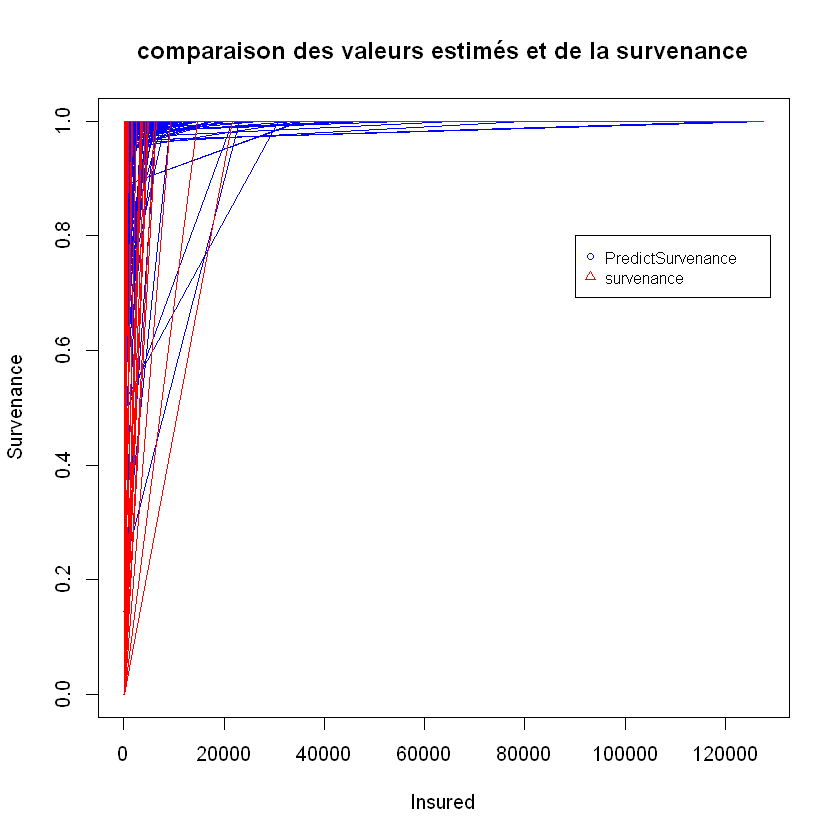

In [47]:
plot(data$Insured, data$predictSurvenance, type = "n", ylim = range(c(data$predictSurvenance,data$Survenance)), xlab = "Insured", ylab = "Survenance",main= "comparaison des valeurs estimés et de la survenance",)
lines(data$Insured, data$predictSurvenance, col = "blue")
lines(data$Insured, data$Survenance, col = "red")
legend(x=90000,y=0.8,c("PredictSurvenance","survenance"),cex=.8,col=c("blue","red"),pch=c(1,2))


## Le modele binomiale ajuste correctement les données et donne une bonne estimation de la survenance.


### 8-2 Visualisation des valeurs predites du nombre de sinistre

On Utilise la fonction plot pour visualiser sur un meme graphe les estimations du nombre de sinsitre du modele de poisson et du modele binomiale negative.


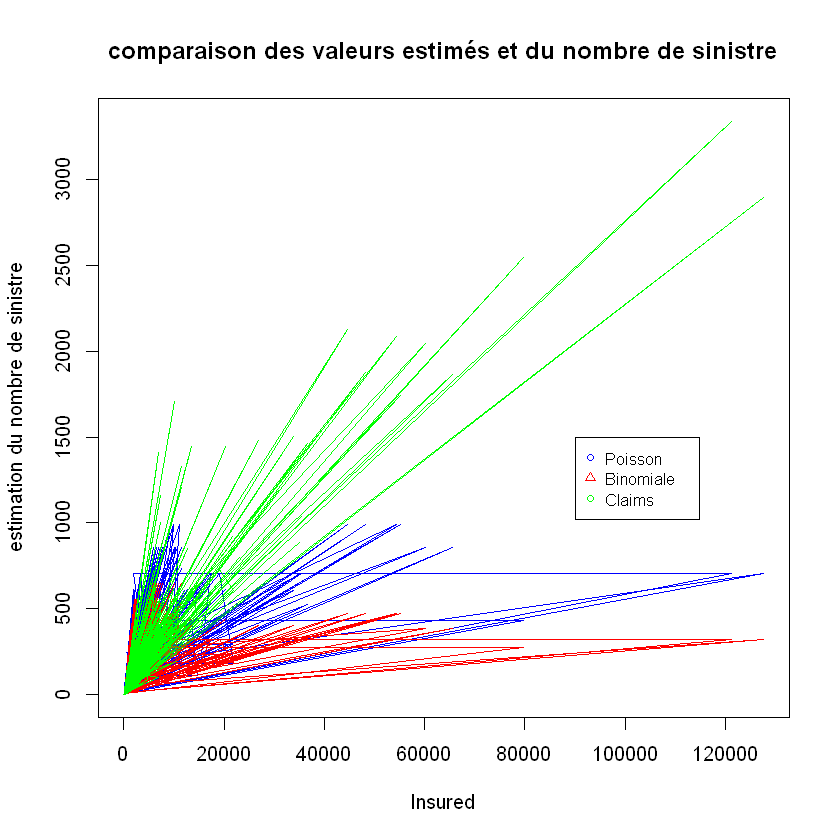

In [57]:
plot(data$Insured, data$predictpoisson, type = "n", ylim = range(c(data$predictpoisson, data$predictbinoneg,data$Claims)), xlab = "Insured", ylab = "estimation du nombre de sinistre",main= "comparaison des valeurs estimés et du nombre de sinistre",)
lines(data$Insured, data$predictpoisson, col = "blue")
lines(data$Insured, data$predictbinoneg, col = "red")
lines(data$Insured, data$Claims, col = "green")
legend(x=90000,y=1500,c("Poisson","Binomiale","Claims"),cex=.8,col=c("blue","red","green"),pch=c(1,2))

Le modele binomiale et le modele de poisson ne donnent pas une bonne estimation du nombre de sinistres de plus il n'ajuste pas correctement les données.

# II- Modelisation du montantdes sinistres

## 1-Modele Gamma

But on veut expliquer le montant des sinistres par les variables explicatives:Zone,Bonus,Make,Insured,,Kilometres.On peut calibrer notre modele avec le glm de gamma.

On doit d'abord enlever toutes les valeurs nulles dans la variable a expliquer Montant des sinistes. En effet la loi gamma ne pren pas en compte les valeurs nulles.

On utilise la fonction filter pour filtrer notre base de données.

In [11]:
data1=filter(data,data$Payment>0)
head(data1)

Kilometres Zone Bonus Make Insured Claims Payment
1 1          1    1     1     455.13 108    392491 
2 1          1    1     2      69.17  19     46221 
3 1          1    1     3      72.88  13     15694 
4 1          1    1     4    1292.39 124    422201 
5 1          1    1     5     191.01  40    119373 
6 1          1    1     6     477.66  57    170913

En effet elle enleve toutes les lignes ou le montant des sinistres est nulles.

### discretisation :decoupage en classe.

On decoupe comme fait precedemment les  variables en classe homogenes en utilisant les  fonction summary pour voir les quantiles ensuite on utilise la fonction cut pour decouper en intervalle.


In [61]:
summary(data1$Zone)
summary(data1$Kilometres)
summary(data1$Insured)
summary(data1$Payment)
summary(data1$Make)
summary(data1$Bonus)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   3.622   5.000   7.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.883   4.000   5.000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.60     42.93    134.82   1323.99    560.17 127687.27 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
      72    10300    43356   312070   150031 18245026 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   5.037   7.000   9.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.101   6.000   7.000 

In [12]:
Zone3=cut(data1$Zone, breaks=c(0,2,3.97,6,7))
Kilometres3=cut(data1$Kilometres, breaks=c(0,2,2.986,4,5))
Insured3=cut(data1$Insured,breaks=c(0,21.61,389.78,1092.20,130000))
Payment3=cut(data1$Payment, breaks=c(1,10300,43356,312070,18245026))
Make3=cut(data1$Make, breaks=c(0,3,5,7,9))
Bonus3=cut(data1$Bonus, breaks=c(0,2,4,6,7))

In [13]:
glmgamma=glm(formula=data1$Payment~Zone3+Kilometres3+Insured3+Make3+Bonus3,family= Gamma())
summary(glmgamma)


Call:
glm(formula = data1$Payment ~ Zone3 + Kilometres3 + Insured3 + 
    Make3 + Bonus3, family = Gamma())

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7692  -0.9852  -0.2913   0.2992   3.3998  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.095e-04  7.635e-06  14.336  < 2e-16 ***
Zone3(2,3.97]               2.438e-08  6.290e-08   0.388 0.698361    
Zone3(3.97,6]               7.211e-08  5.093e-08   1.416 0.157022    
Zone3(6,7]                  1.049e-05  2.918e-06   3.594 0.000334 ***
Kilometres3(2.99,4]         1.712e-07  6.479e-08   2.642 0.008318 ** 
Kilometres3(4,5]            4.418e-07  1.732e-07   2.552 0.010805 *  
Insured3(21.6,390]         -8.758e-05  7.660e-06 -11.432  < 2e-16 ***
Insured3(390,1.09e+03]     -1.049e-04  7.638e-06 -13.728  < 2e-16 ***
Insured3(1.09e+03,1.3e+05] -1.082e-04  7.634e-06 -14.168  < 2e-16 ***
Make3(3,5]                  2.340e-06  5.684e-07   4.116 4.03e

Exemple d'interpretation


In [63]:
mt=1/(1.095e-04+7.211e-08+ 1.712e-07+5.057e-07-1.039e-06 -1.049e-04)
mt

[1] 232018

une personne ayant les caratéristiqures suivantes:

     Zone3(3.97,6] ,Kilometres3(2.99,4],Bonus3(2,4] ,Make3(7,9],Insured3(390,1.09e+03] ,
     paie en moyenne un montant de 232018.


# 2- Modele gaussienne

In [14]:
glmgaussian=glm(formula=data1$Payment~Zone3+Kilometres3+Insured3+Make3+Bonus3,family= gaussian())
summary(glmgaussian)


Call:
glm(formula = data1$Payment ~ Zone3 + Kilometres3 + Insured3 + 
    Make3 + Bonus3, family = gaussian())

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1697361   -179073     34518    149985  16227862  

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  195345      95539   2.045  0.04103 *  
Zone3(2,3.97]                -35868      66558  -0.539  0.59002    
Zone3(3.97,6]                -82173      50415  -1.630  0.10329    
Zone3(6,7]                  -278718     101556  -2.744  0.00612 ** 
Kilometres3(2.99,4]         -133371      49737  -2.682  0.00740 ** 
Kilometres3(4,5]            -186494      66555  -2.802  0.00513 ** 
Insured3(21.6,390]             4599      74664   0.062  0.95089    
Insured3(390,1.09e+03]        18250      95074   0.192  0.84780    
Insured3(1.09e+03,1.3e+05]  1196542     102679  11.653  < 2e-16 ***
Make3(3,5]                   -55790      62466  -0.893  0.37191    
M

In [65]:
mt1= 195345-82173-186494 +4599-55790   +163077
mt2=195345  -133371-126172+544373 + 18250-82173

## 3- Modele inverse gaussienne

In [15]:
glminvgaussian=glm(formula=data1$Payment~Zone3+Kilometres3+Insured3+Make3+Bonus3,family = inverse.gaussian())
summary(glminvgaussian)


Call:
glm(formula = data1$Payment ~ Zone3 + Kilometres3 + Insured3 + 
    Make3 + Bonus3, family = inverse.gaussian())

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.116899  -0.006352  -0.000796   0.000776   0.018228  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.258e-08  9.960e-10  12.631   <2e-16 ***
Zone3(2,3.97]               3.923e-15  2.366e-13   0.017   0.9868    
Zone3(3.97,6]               1.990e-14  2.645e-13   0.075   0.9400    
Zone3(6,7]                  3.395e-10  1.994e-10   1.702   0.0889 .  
Kilometres3(2.99,4]         8.347e-14  4.959e-13   0.168   0.8663    
Kilometres3(4,5]            3.732e-13  1.899e-12   0.197   0.8442    
Insured3(21.6,390]         -1.205e-08  9.967e-10 -12.088   <2e-16 ***
Insured3(390,1.09e+03]     -1.256e-08  9.960e-10 -12.607   <2e-16 ***
Insured3(1.09e+03,1.3e+05] -1.258e-08  9.960e-10 -12.629   <2e-16 ***
Make3(3,5]                  1.6

## 3- Comparaison des modeles 

In [70]:
c(AIC(glmgamma),AIC(glmgaussian),AIC(glminvgaussian))

[1] 43840.58 54507.75 46089.95

On constate d'apres les sorties de nos glm en comparant les AIC que le modele gamma est le modele qui minimise notre AIC par conséquent on conclu que le modele gamma est notre meilleur modele parmi les modeles testés.


## 4- Selection des variables 

On va tester la significativité de nos variables pour ensuite utiliser la methode descendante comme on a fait precedemment avec le nombre de sinistre

In [72]:
anova(glmgamma,test='Chisq')

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)    
NULL        NA         NA 1796      7088.826             NA
Zone3        3  340.49482 1793      6748.331   5.021652e-75
Kilometres3  2  363.36495 1791      6384.966   2.869681e-81
Insured3     3 4291.12302 1788      2093.843   0.000000e+00
Make3        3  194.40520 1785      1899.438   9.157417e-43
Bonus3       3   68.57741 1782      1830.861   4.265295e-15

Toutes les variables sont significatives comme avec le nombre de sinistre on conserve pour ce modele toutes les variables explicatives.


## 5- Validation du modele

In [73]:
1-pchisq(glmgamma$deviance,glmgamma$df.resid)

[1] 0.2054747

ce modele ajuste correctement nos données

## 6- Prediction du montant des sinistres

In [ ]:
On utilise la fonction predict.glm() pour estimer le montant d'un sinistre

### 6-1 Prediction avec le modele gamma

In [16]:
data001=data1[1450:2182,]
predict=predict.glm(glmgamma,newdata = data001,type="response",se.fit=TRUE)
data1$Paymentgammapredict=predict$fit
head(data1$Paymentgammapredict)

Warning message:
"'newdata' had 733 rows but variables found have 1797 rows"

[1] 217433.04  45712.63  45712.63 275301.39  41295.76 160383.86

predict$fit: donne les valeurs estimées

predict$se.fit: donne les erreurs commise lors des estimations


### 6-2 Prediction avec le modele gaussien

In [17]:
predictgaussian=predict.glm(glmgaussian,newdata = data001,type="response",se.fit=TRUE)
data1$Paymentpredictgauss=predictgaussian$fit
head(data1$Paymentpredictgauss)

Warning message:
"'newdata' had 733 rows but variables found have 1797 rows"

[1]  213594.7  199944.2  199944.2 1336097.3  144154.1  170163.9

predictgaussian$fit: donne les valeurs estimées

predictgaussian$se.fit: donne les erreurs commise lors des estimations

### 6-3 Prediction avec le modele inverse gaussienne

In [18]:
predictinvgaussian=predict.glm(glminvgaussian,newdata = data001,type="response",se.fit=TRUE)
data1$Paymentpredictinvgauss=predictinvgaussian$fit
head(data1$Paymentpredictinvgauss)

Warning message:
"'newdata' had 733 rows but variables found have 1797 rows"

[1] 206975.09  43351.95  43351.95 232180.97  42680.12 175131.67

In [91]:
Paymentpredict=data.frame(data1$Payment,data1$Paymentgammapredict,data1$Paymentpredictinvgauss,data1$Paymentpredictgauss)
head(Paymentpredict)

data1.Payment data1.Paymentgammapredict data1.Paymentpredictinvgauss
1 392491        217433.04                 206975.09                   
2  46221         45712.63                  43351.95                   
3  15694         45712.63                  43351.95                   
4 422201        275301.39                 232180.97                   
5 119373         41295.76                  42680.12                   
6 170913        160383.86                 175131.67                   
  data1.Paymentpredictgauss
1  213594.7                
2  199944.2                
3  199944.2                
4 1336097.3                
5  144154.1                
6  170163.9

Ce tableau contenant le montant des sinistres de départ, les estimations du modele gamma, du modele inverse gausian, gaussain



### 7- Visualisation des valeurs estimées

On Utilise la fonction plot pour visualiser sur un meme graphe les estimations du montant des sinsitre du modele gamma et du modele inverse gaussian.


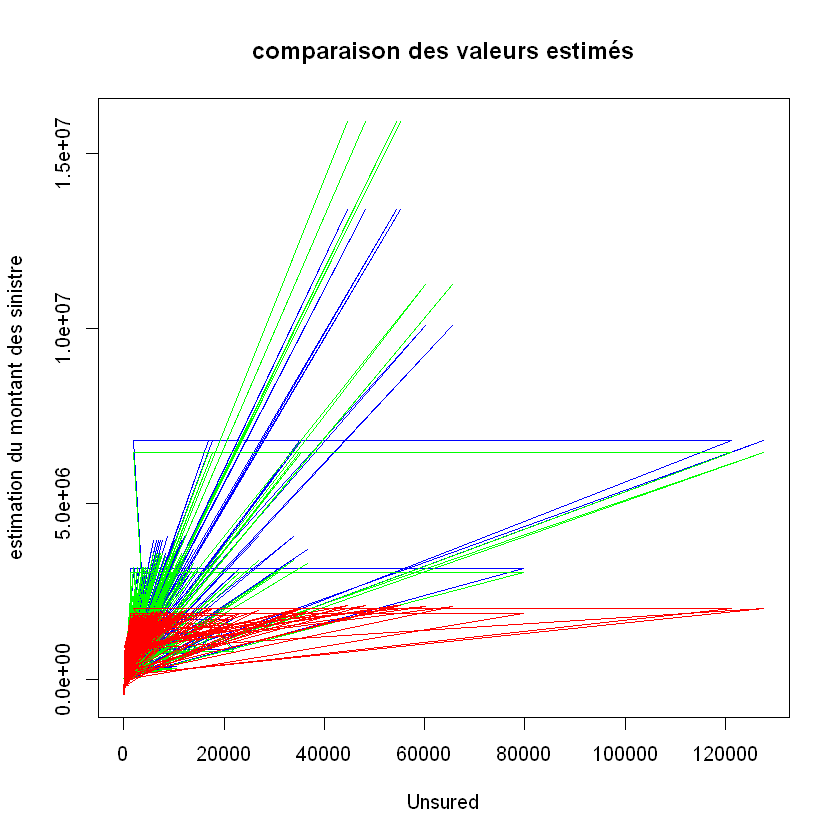

In [101]:
plot(data1$Insured, data1$Paymentgammapredict, type = "n", ylim = range(c(data1$Paymentgammapredict,data1$Paymentpredictinvgauss,data1$Paymentpredictgauss)), xlab = "Unsured", ylab = "estimation du montant des sinistre",main= "comparaison des valeurs estimés",)
lines(data1$Insured, data1$Paymentgammapredict, col = "blue")
lines(data1$Insured, data1$Paymentpredictinvgauss, col = "green")
lines(data1$Insured, data1$Paymentpredictgauss, col = "red")

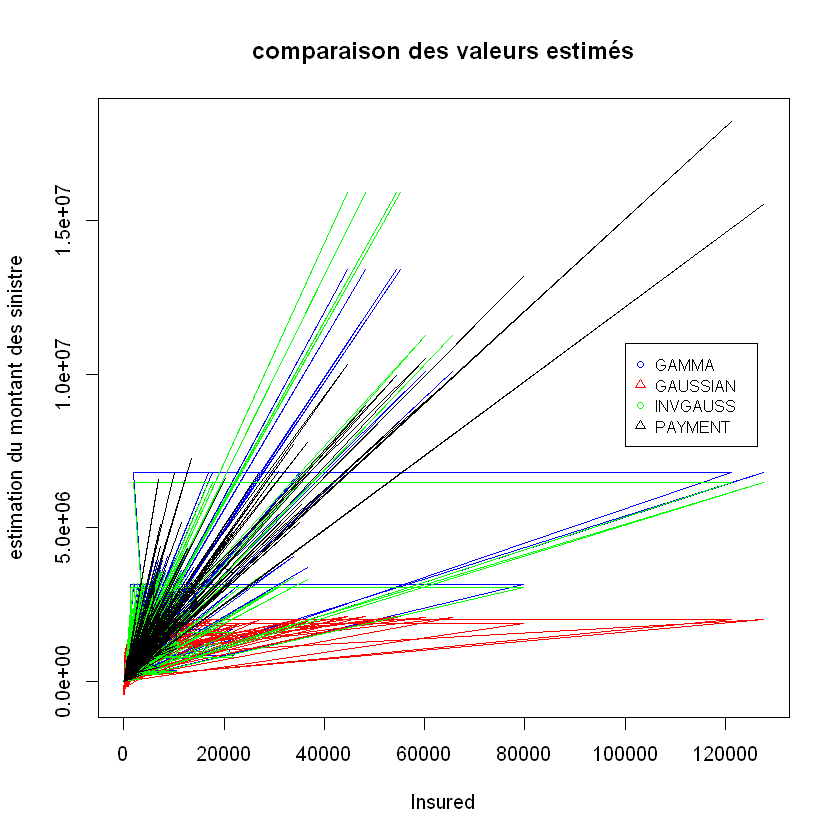

In [19]:
plot(data1$Insured, data1$Paymentgammapredict, type = "n", ylim = range(c(data1$Payment,data1$Paymentgammapredict,data1$Paymentpredictinvgauss,data1$Paymentpredictgauss)), xlab = "Insured", ylab = "estimation du montant des sinistre",main= "comparaison des valeurs estimés",)
lines(data1$Insured, data1$Paymentgammapredict, col = "blue")
lines(data1$Insured, data1$Paymentpredictgauss, col = "red")
lines(data1$Insured,data1$Paymentpredictinvgauss, col = "green")
lines(data1$Insured,data1$Payment)
legend(x=100000,y=11000000,c("GAMMA","GAUSSIAN","INVGAUSS","PAYMENT"),cex=.8,col=c("blue","red","green","black"),pch=c(1,2))

In [108]:
min(data1$Paymentpredictgauss)

[1] -439469.7

## Remarque
Le modele gaussian donne des estimations du montant qui sont négatives.
On a pas de bonne estimations avec le modele gaussian.

Verifions le modele ou on amoins d'erreur d'estimation entre le modele gamma et inverse gaussienne.

In [ ]:
Erreur de prediction du modele gamma

In [109]:
summary(predict$se.fit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    532    1402    1504   67561   12535 6041456 

In [ ]:
Erreur de prediction du modele inverse binomiale.

In [110]:
summary(predictinvgaussian$se.fit)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      343      1755      1776   1034574     35180 191113895 

### Interpretation

En analysant les sorties du summary des erreurs de predictions des deux modeleS
On constate que le modele inverse gaussienne donne plus d'erreur de prediction que le modele gamma 
On constate que le modele gamma donne une meilleur estimation du montant des sinsitres.





# Le modele gamma est notre meilleur modele: il ajuste correctement nos données de plus donne une meilleur prediction.

